In [2]:
# All packages used throughout this notebook

# General
import warnings                                                             
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
 
# Statmosdels
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import *
from statsmodels.stats.diagnostic import het_breuschpagan

# Scikit-Learn
from sklearn.datasets import load_diabetes
from scipy.stats import jarque_bera

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading in Relevant Data
#------------------------------------------------------------------------
diabetes = load_diabetes(scaled = True)     
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target

def MaleOrFemale(x):
    if x < 0: return 0
    return 1

df['sex'] = df['sex'].apply(lambda x: MaleOrFemale(x))
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,1,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,1,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,1,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,1,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,0,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


<hr>
<p style="text-align:center; font-size:x-large; color:black;">Diagnostic Tests & Plots</p>
<hr>

When it comes to linear regresions, there are 4 assumptions that must be held to make our predictions/inferences actually viable... <br>

1.) __True Linear Relationship__ The relationship between the independent variables (predictors) and the dependent variable (response) can be adequately described by a linear function. <br>

2.) __Normality of Residuals__ Our model's residuals should follow a normal distribution. Normally distributed residuals are important for creating valid hypothesis tests and confidence intervals. Deviations from normality can reduce the accuracy of both of these things. <br>

3.) __Homoscedacity of Residuals__  The variance of our model's residuals should be constant across all levels of the predictors. Heteroscedasticity (unequal variance) can lead to inefficient estimates and biased standard errors. <br>

4.) __Independence of Residuals__ Our model's residuals shouldn't affect the values of other residuals. Violations of this assumption can lead to biased parameter estimates and incorrect inferences. <br>

In the context of Linear Regressions, __Diagnostics__ are ways we can assess if the 4 assumptions hold for a given model. These can either be __visualizations/plots__ or __statistical tests__. Below, I will outline both plots and tests that check if the assumptions of Linear Regression hold for a given model. The models I'll compare diagnostics from are...
- A linear regression of Target on the predictors 'sex', 'bmi', 'bp', 's1', 's3', and 's5' (from the sklearn diabetes dataset) $$Target = \beta_{0} + \beta_{1}\text{sex} + \beta_{2}\text{bmi} + \beta_{3}\text{bp} + \beta_{4}\text{s1} + \beta_{5}\text{s3} + \beta_{6}\text{s5}$$ 
- A linear regression on the linear function $$ y = x + 1 + N(0,1)$$
- A linear regression on the quadratic function $$ y = \left( \frac{x}{50} \right) ^{2} + N(0,1)$$

In [4]:
model = sm.OLS(df['target'], sm.add_constant(df[['sex', 'bmi', 'bp', 's1', 's3', 's5']])).fit()

x = [(i) for i in range(1000)]
y = [(i + 1 + np.random.normal(loc = 0, scale = 1, size = 1)) for i in range(1000)]
y2 = [np.square((i/50) + np.random.normal(loc = 0, scale = 1, size = 1)) for i in range(1000)]

linear_relationship = sm.OLS(y, sm.add_constant(x)).fit()
quadratic_relationship = sm.OLS(y2, sm.add_constant(x)).fit()

<p style="text-align:left; font-size:x-large; color:black;"> Assessing Linearity </p>

<p style="text-align:left; font-size:large; color:black;"><b>Residuals v.s Fitted Plots</b></p>

In this plot, a model's residuals are plotted against it's fitted values. If the relationship is truly linear, the residuals should be randomly scattered around zero across the range of fitted values. We realize because of this definition, we are essentially looking for the normality and homoscedacity of residuals from this plot.

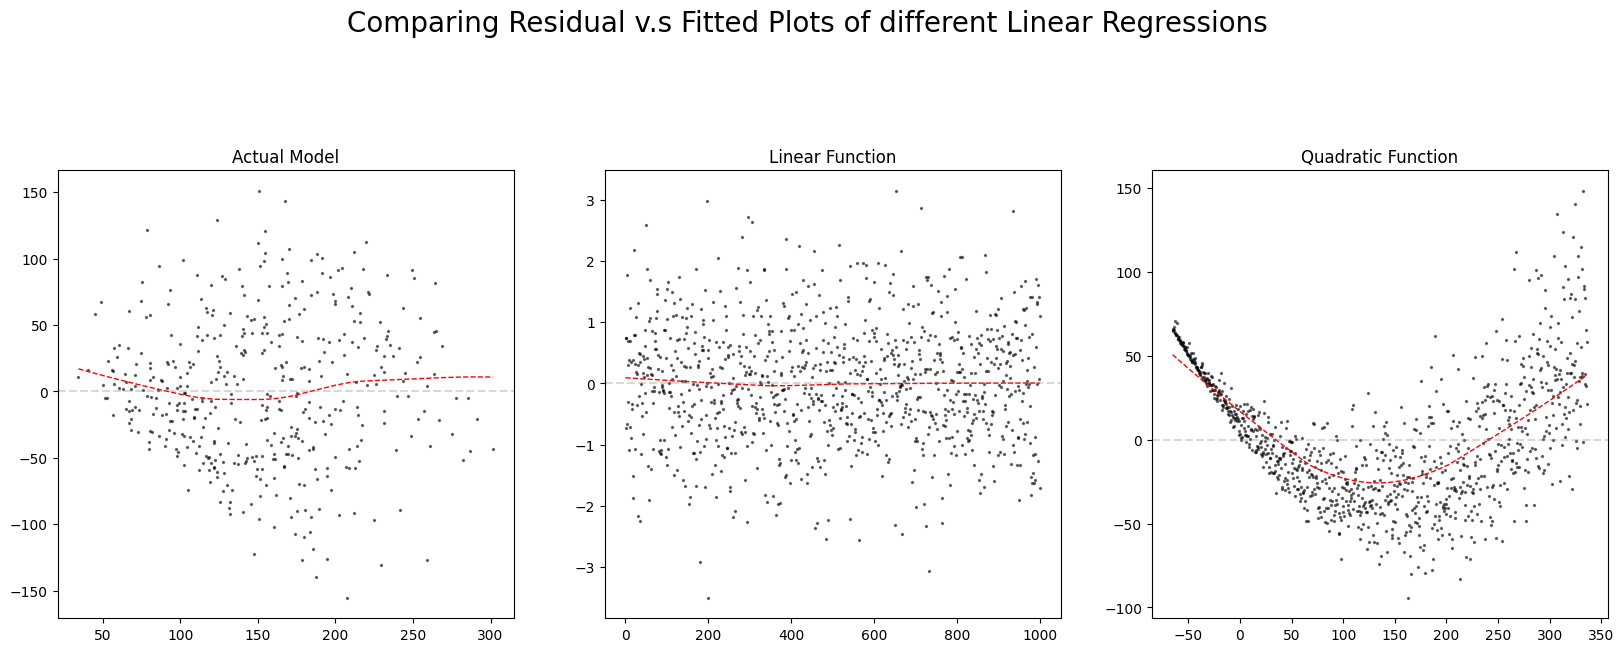

In [5]:
predictions = [model.predict(sm.add_constant(df[['sex', 'bmi', 'bp', 's1', 's3', 's5']])),
            linear_relationship.predict(sm.add_constant(x)),
            quadratic_relationship.predict(sm.add_constant(x))]

residuals = [model.resid, 
            linear_relationship.resid, 
            quadratic_relationship.resid]

fig, axs = plt.subplots(1, 3, figsize=(20, 7)) 

for i in range(len(residuals)):

    sns.regplot(x = predictions[i], y = residuals[i], lowess = True,
                scatter_kws = {'color': 'black', 'alpha': 0.5, 's':2},
                line_kws={'color': 'red', 'lw': 1, 'linestyle':'--'} , ax = axs[i])
    axs[i].axhline(y = 0, color = 'gray', linestyle = '--', alpha = 0.3)

axs[0].set_title('Actual Model')
axs[1].set_title('Linear Function')
axs[2].set_title('Quadratic Function')
plt.suptitle('Comparing Residual v.s Fitted Plots of different Linear Regressions', fontsize = 20)
plt.subplots_adjust(top=0.75)
plt.show()


- __Actual Model:__ The residuals seem to be randomly scattered around 0, which suggests that the models residuals are roughly normal with mean 0. Additionally, the variance of residuals seems to start off small, and then increase as we get larger to the 150-200 range, which makes me believe that this model's residuals are heteroscedastic.
- __Linear Function:__ Since we ran a linear regression on a truly linear function, it makes sense that the residuals appear normally distributed around 0 with constant variance. If a linear model has a Residuals v.s Fitted Plot that looks like this, it highly suggests that a linear function adequately describes the true relationship.
- __Quadratic Function:__ Since we ran a linear regression on a truly quadratic function, we know that our diagnostic tests/plots wil probably not be ideal. In the case of these Residuals v.s Fitted Plot, the residuals are not randomly scattered around 0, and the residuals exhibit clear heteroscedacity. If a linear model produces a Residuals v.s Fitted Plot that looks like this, it highly suggest that a linear function cannot adequately describe the true relationship.

<p style="text-align:left; font-size:x-large; color:black;"> Assessing Normality of Residuals </p>

While we can somewhat infer normality of residuals from a Residuals v.s Fitted Plot, I blieve htat there are some other plots that do a better job of visualizing it.

<p style="text-align:left; font-size:large; color:black;"><b>Q-Q Plots</b></p>

In a Q-Q plot, the quantiles of the sample data are plotted against the quantiles of the theoretical distribution. In this case, we are going to plot the quantiles of a model's (standardized) residuals against the quantiles of a theoretical standard normal distirbution. If the points in the plot approximately fall along the straight line (y = x), it suggests that our sample distribution is similar to the probability distribution distribution we're testing. If the points deviate from the straight line, it indicates a difference from the theoretical probability distribution.

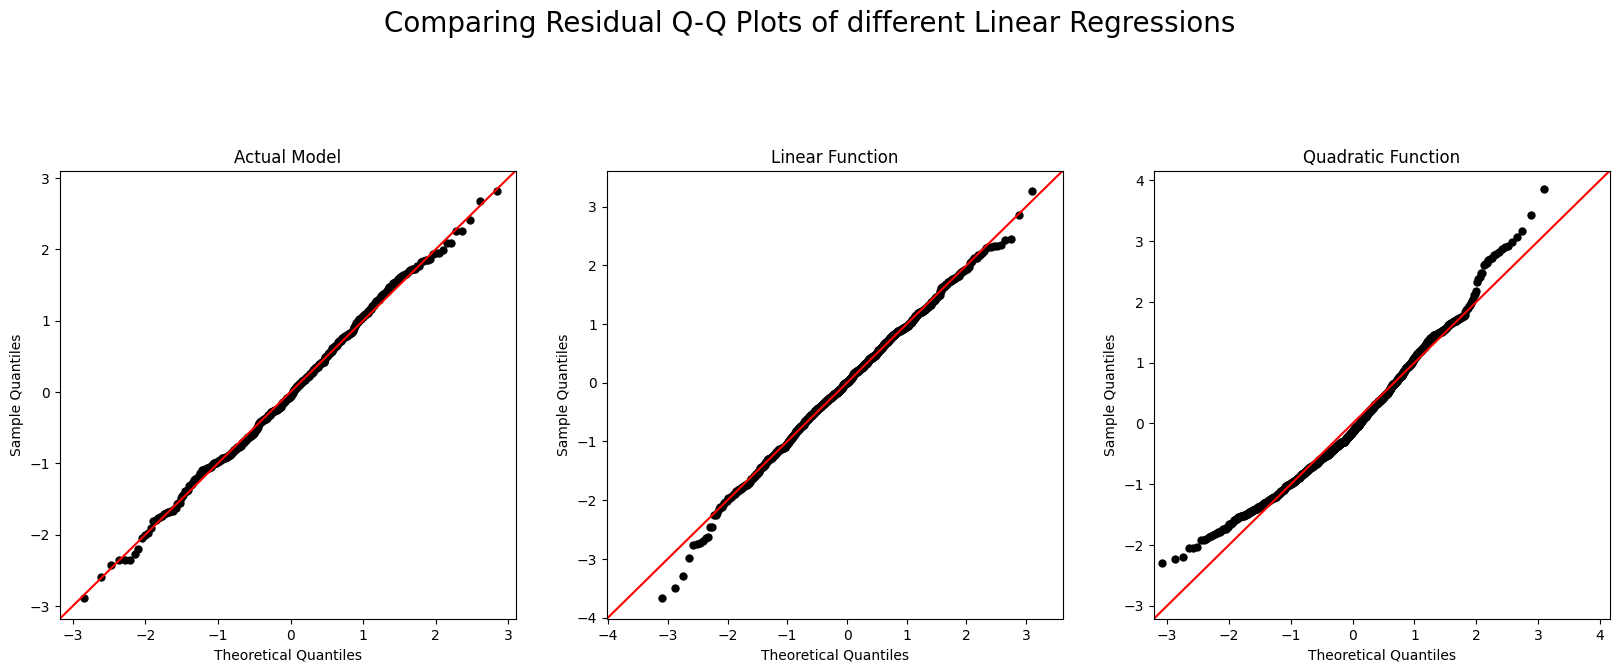

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7)) 

for i in range(len(residuals)):
    mean_resid = np.mean(residuals[i])
    std_resid = np.std(residuals[i])
    standardized_residuals = [(x - mean_resid) / std_resid for x in residuals[i]]

    sm.qqplot(np.array(standardized_residuals), line = '45',  markerfacecolor = 'black', markeredgecolor  = 'None', ax = axs[i])
    axs[i].set_title('Q-Q Plot of Actual Model Resids')

axs[0].set_title('Actual Model')
axs[1].set_title('Linear Function')
axs[2].set_title('Quadratic Function')

plt.suptitle('Comparing Residual Q-Q Plots of different Linear Regressions', fontsize = 20)
plt.subplots_adjust(top = 0.75)

plt.show()

- __Actual Model:__ Since the quantiles of our models residuals seem to be in line with the quantiles of a theoretical normal distribution, we can assume that our model's residuals are normally distributed.
- __Linear Function:__ This model's residuals' quantiles are also in line with the quantiles of a theoretical normal distribution, which suggests normality of residuals. This makes sense becuase we performed a linear regression on a linear function.
- __Quadratic Function:__ The quantiles of the model's residuals seem to be larger than the quantiles of a theoretical normal distribution at the tails, which suggests that the sample has a tendency to have larger values than what would be expected under a normal distribution. If we wanted to be even more nitpicky, we can see that the sample quantiles are lower than the theoretical normal distribution's quantiles, which suggets a tendency for the sample to have lower values than what would be expected under a normal distribution. If we see a Q-Q Plot like this, it suggests that our model's residuals are not noramlly distributed.   

<p style="text-align:left; font-size:large; color:black;"><b>Kernel Density Estimates (KDEs)</b></p>

KDEs are a fancy method for estimating the probability density function (PDF) of a random variable, any they are used to visualize the distribution of data in a smoother and more interpretable way than histograms (in my opinion). One way to check if a model's residuals are normal is by graphing it's KDE along with a theoretical normal distribution.

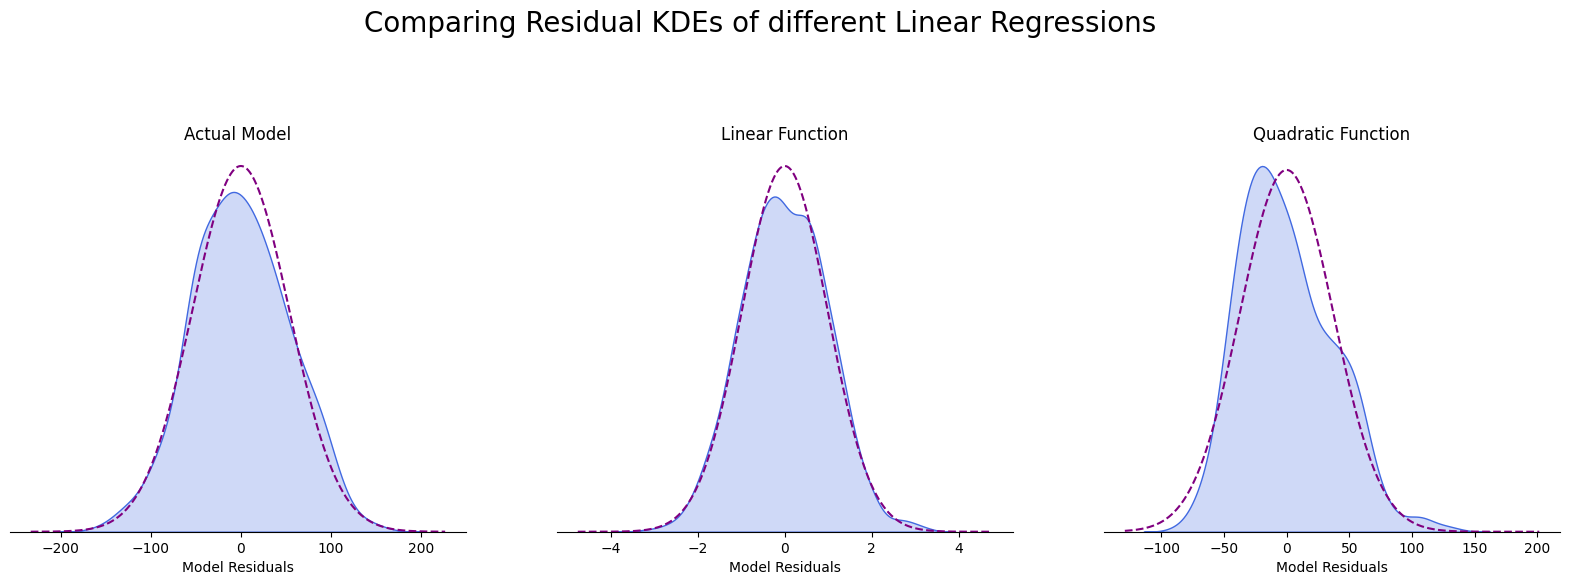

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 

residuals = [model.resid, linear_relationship.resid, quadratic_relationship.resid]

for i in range(len(residuals)):

    normal_x = np.linspace(np.min(residuals[i]) * 1.5, np.max(residuals[i]) * 1.5, 1000)
    normal_pdf = 1 / (np.std(residuals[i]) * np.sqrt(2 * np.pi)) * np.exp(-0.5 * normal_x**2 / np.var(residuals[i]))
    axs[i].plot(normal_x, normal_pdf, color='purple', linestyle = '--', label='True Normal Distribution')

    sns.kdeplot(residuals[i], color = '#4169E1', fill = True, ax = axs[i])
    axs[i].spines[['top', 'right', 'left']].set_visible(False)
    axs[i].set_xlabel('Model Residuals')
    axs[i].set_yticks([])
    axs[i].set_ylabel("")

axs[0].set_title('Actual Model')
axs[1].set_title('Linear Function')
axs[2].set_title('Quadratic Function')

plt.suptitle('Comparing Residual KDEs of different Linear Regressions', fontsize = 20)
plt.subplots_adjust(top = 0.75)

plt.show()

We can draw the same conclusions about each of these models' residuals that we did from the Q-Q Plots, however, I find this as an easier way to view the distribtuion of residuals.

<p style="text-align:left; font-size:large; color:black;"><b> Jarque-Bera Test</b></p>

The Jarque-Bera test is a statistical __test__ used to determine whether the given data has skewness and kurtosis that are approximately normally distributed.
- __Skew__ measures the asymmetry of a distribution. Data that is skewed to the left results in negative skew, while data that is skewed to the right results in positive skew. Since a normal distribution is perfectly symmetric, it has a skew of __0__.
$$
\text{Skew}(x) = E\left[ \left( \frac{x- \mu}{\sigma} \right)^{3} \right]
$$
- __Kurtosis__ measures the peakedness or flatness of a distribution. High kurtosis indicates a relatively peaked distribution, while low kurtosis indicates a relatively flat distribution. Since the Kurtosis of a normal distribution is exactly __3__, a kurtosis roughly equal to 3 means approximate normality.
$$
\text{Kurt}(x) = E\left[ \left( \frac{x- \mu}{\sigma} \right)^{4} \right]
$$

The __null hypothesis (H0)__ of the Jarque-Bera test is that the skewness and kurtosis of our data are equal to 0 and 3 respectively. This means that if we run the Jarque-Bera test on our model's residuals and get a P-Value above a certain significance level, we fail to reject the null hypothesis that our model's residuals are normally distributed. However, if the p-value if less than a key significance level, we reject the null hypothesis with strong enough proof that our model's residuals are not noramlly distributed.

In [7]:
def significant(x):
    if x > 0.05: 
        return 'we fail to reject H0. Residuals are likely normal.\n'
    return 'We can reject H0. Residuals are likely non-normal.\n'

print('Jarque Bera Test - Actual Model')
jb_statistic, jb_p_value = jarque_bera(model.resid)
print(f'Jarque Bera P-Value: {jb_p_value}. {significant(jb_p_value)}')

print('Jarque Bera Test - Linear Function')
jb_statistic, jb_p_value = jarque_bera(linear_relationship.resid)
print(f'Jarque Bera P-Value: {jb_p_value}. {significant(jb_p_value)}')

print('Jarque Bera Test - Quadratic Function')
jb_statistic, jb_p_value = jarque_bera(quadratic_relationship.resid)
print(f'Jarque Bera P-Value: {jb_p_value}. {significant(jb_p_value)}')


Jarque Bera Test - Actual Model
Jarque Bera P-Value: 0.5351393918621884. we fail to reject H0. Residuals are likely normal.

Jarque Bera Test - Linear Function
Jarque Bera P-Value: 0.0848680817579721. we fail to reject H0. Residuals are likely normal.

Jarque Bera Test - Quadratic Function
Jarque Bera P-Value: 2.5144563782399165e-10. We can reject H0. Residuals are likely non-normal.



Through the Jarque-Bera tests, we can conclude that the Linear Regression on the Quadratic Function is unlikely to produce normally distributed residuals. The other two Linear Regressions most likely have normally disributed residuals however. These conclusions line up with our Q-Q Plots and our KDEs. In my opinion, combining a diagonstic test like Jarque-Bera with a diagnostic plot like KDE is a good way to assess the normality assumption.

<p style="text-align:left; font-size:x-large; color:black;"> Assessing Homoscedacity of Residuals </p>

<p style="text-align:left; font-size:large; color:black;"><b> Scale-Location Plot</b></p>

This is the most common diagnostic plot when assessing the homoscedacity of residuals. Our line of best fit should be roughly flat to assume homoscedacity. If the 'line' of best fit isn't roughly horizontal, it implies that certain regions of our fitted values have statistically low/high variance of resdiuals compared to the rest of the model.
$$
\text{X-Axis: Fitted Values} 
$$
$$
\text{Y-Axis: } \sqrt{|\text{standardized residuals}|} = \sqrt{\left| \frac{\text{residual}}{\sigma_{\text{residuals}}} \right|}
$$



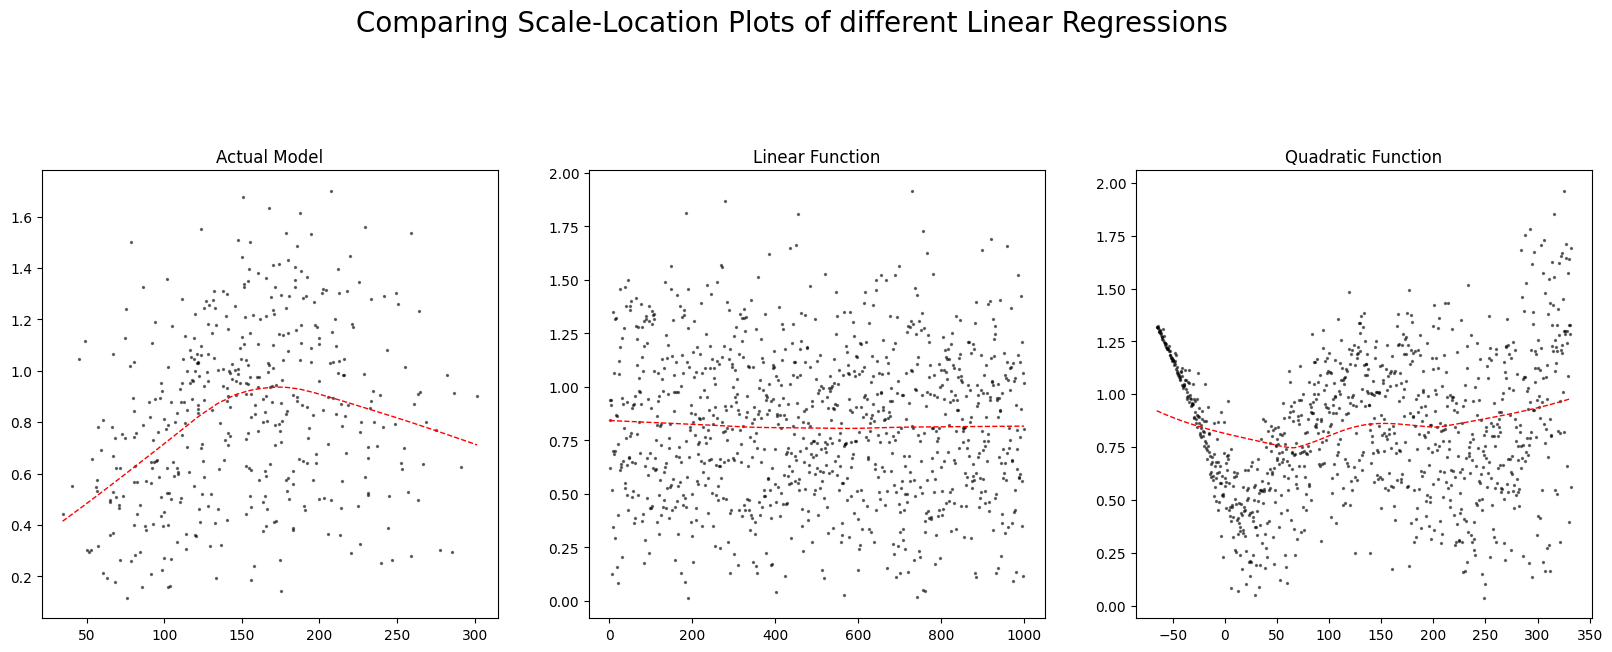

In [10]:

fig, axs = plt.subplots(1, 3, figsize=(20, 7)) 

for i in range(len(residuals)):

    std_resid = np.std(residuals[i])
    standardized_residuals = [x / std_resid for x in residuals[i]]
    sns.regplot(x = predictions[i], y = np.sqrt(np.abs(standardized_residuals)), lowess = True,
                scatter_kws = {'color': 'black', 'alpha': 0.5, 's':2},
                line_kws={'color': 'red', 'lw': 1, 'linestyle':'--'}, ax = axs[i])

axs[0].set_title('Actual Model')
axs[1].set_title('Linear Function')
axs[2].set_title('Quadratic Function')

plt.suptitle('Comparing Scale-Location Plots of different Linear Regressions', fontsize = 20)
plt.subplots_adjust(top = 0.75)
plt.show()


From the above diagnostic plots, it seems that the Linear Regressions performed on the Diabetes dataset and the quadratic function exhibit heteroscedacity. 

<p style="text-align:left; font-size:large; color:black;"><b> Breusch-Pagan Test </b></p>

This is a common statistical test for detetcing heteroscedacity. The test involves regressing the squared residuals from a regression model onto the independent variables, which is often called an __auxiliary regression__. The test statistic is based on the R-squared of this auxiliary regression.

In [20]:
prediction_formulas = [sm.add_constant(df[['sex', 'bmi', 'bp', 's1', 's3', 's5']]),
                       sm.add_constant(x),
                       sm.add_constant(x)]

results = pd.DataFrame(columns = ['LM Statistic', 'LM-Test P-Value', 'F Statistic', 'F-Test P-Value'])
for i in range(len(residuals)):
    
    test = het_breuschpagan(residuals[i], prediction_formulas[i])
    results.loc[len(results)] = test

results.index = ['Actual Model', 'Linear Function', 'Quadratic Function']
results

,LM Statistic,LM-Test P-Value,F Statistic,F-Test P-Value
Actual Model,20.695322,2.080704e-03,3.561344,1.868930e-03
Linear Function,0.729899,3.929159e-01,0.728971,3.934217e-01
Quadratic Function,47.441269,5.667681e-12,49.704428,3.333157e-12


The Breusch-Pagan Test returns two different Statistic/P-Value pairs: LM and F. Both of these p-values can be used to test the null hypothesis of homoscedacity. According to our results, the Linear Regressions on the Diabetes dataset and the quadratic function likely exhibit heterosceacity since the p-values for both statistics are less than 0.05 (even 0.005). For the linear regression on the linear function, we fail to reject the null hypothesis of homoscedacity.

<p style="text-align:left; font-size:x-large; color:black;"> Assessing Independence of Residuals </p>

<p style="text-align:left; font-size:large; color:black;"><b> Auto-Correlation Function (ACF) Plots </b></p>

The Auto-Correlation Function (ACF) measures the correlation between a time series and a lagged version of itself. The ACF at lag k is simply the correlation coefficient of x<sub>t</sub> and x<sub>t + k</sub>. An ACF plot will plot the ACF for a bunch of ks. Even if our data isn't a time-series, we can still use ACFs to visualize autocorrelation.

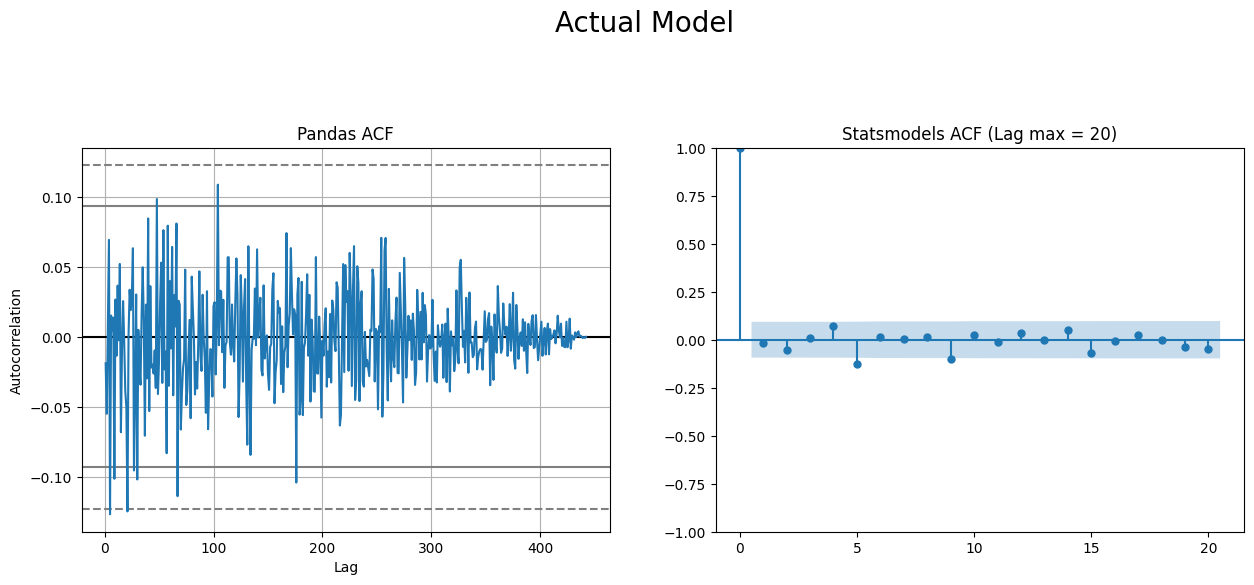

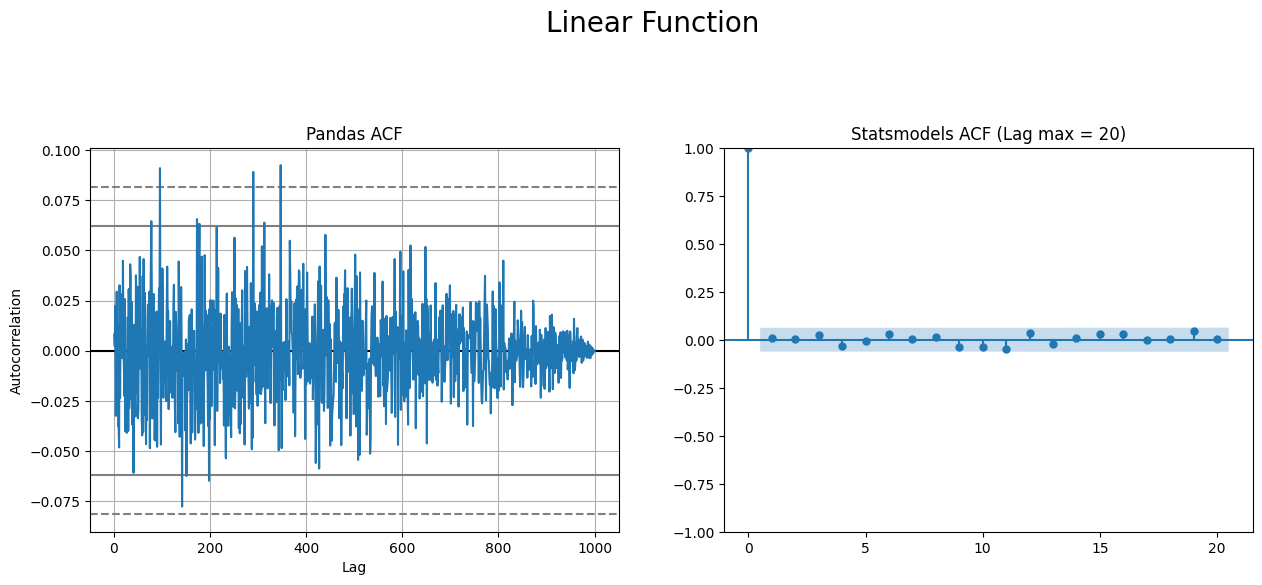

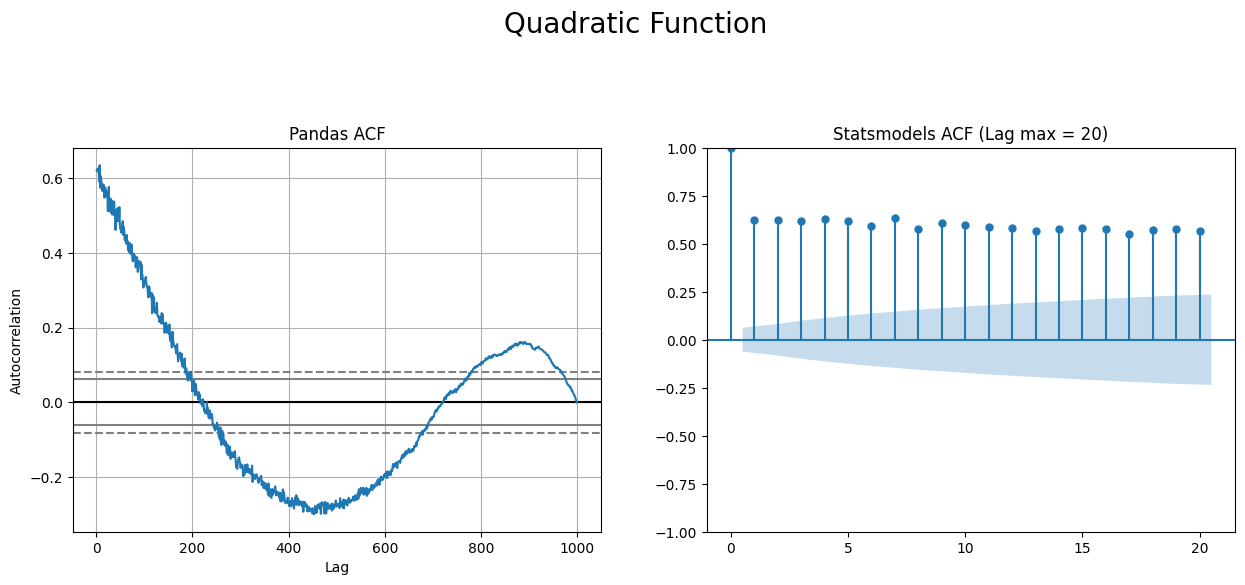

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

for i in range(len(residuals)):

    fig, axs = plt.subplots(1, 2, figsize=(15, 6)) 

    pd.plotting.autocorrelation_plot(residuals[i], ax = axs[0])
    plot_acf(residuals[i], lags = 20, ax = axs[1])

    axs[0].set_title('Pandas ACF')
    axs[1].set_title('Statsmodels ACF (Lag max = 20)')

    plt.suptitle(np.where(i == 0, 'Actual Model', np.where(i == 1, 'Linear Function', 'Quadratic Function')), fontsize = 20)
    plt.subplots_adjust(top = 0.75)
    plt.show()

If a ACF at lag k falls outside of the horizontal bands, it means that the autocorrelation is __most likely__ statistically significant. If the ACF at lag k falls within the bands, the autocorrelation is statistically insignificant, which means no autocorrelation. By looking at the ACF plots of our 3 Linear Regressions, the regression on the Quadratic Function exhibits lots of autocorrelation between residuals, which means that the values of residuals are dependent on other residuals. For the regressions on the Diabetes dataset and linear function, there is __most likely__ no statistically significant autocorrelation between residuals, which means independence of residuals.

<p style="text-align:left; font-size:large; color:black;"><b> Ljung-Box Test </b></p>

The reason I emphasize most likely is because within the ACF plots of the residuals of the Diabetes dataset and linear function, we notice a couple of spikes above the significance bars. This could either be due to sampling variation or true statistical significance. One way to assess this is through the Ljung-Box Test. This test is used to determine whether there is significant autocorrelation in a time series at lags up to a specified lag order k.

In [6]:
from statsmodels.stats.diagnostic import acorr_ljungbox

for i in range(len(residuals)):
    
    print(np.where(i == 0, 'Actual Model', np.where(i == 1, 'Linear Function', 'Quadratic Function')))
    test_results = acorr_ljungbox(residuals[i], lags = 400)
    print(test_results[test_results['lb_pvalue'] <= 0.05])
    print()

Actual Model
      lb_stat  lb_pvalue
67  88.304715   0.041695
68  88.652132   0.047084
70  91.234453   0.045052
71  92.077669   0.047097

Linear Function
Empty DataFrame
Columns: [lb_stat, lb_pvalue]
Index: []

Quadratic Function
          lb_stat      lb_pvalue
1      353.123835   8.848892e-79
2      682.263363  7.053311e-149
3     1055.402147  1.723438e-228
4     1380.074377  1.445966e-297
5     1718.221080   0.000000e+00
..            ...            ...
396  33616.399835   0.000000e+00
397  33736.845780   0.000000e+00
398  33843.039627   0.000000e+00
399  33942.203147   0.000000e+00
400  34052.840831   0.000000e+00

[400 rows x 2 columns]



- __Actual Model:__ There seems to be some significant autocorrelations (67-71), which implies slight heteroscedacity.
- __Linear Function:__ There are no significant autocrrelations up to lag 400, which implies homosceacity.
- __Quadratic Function:__ Every autocorrealation up to lag 400 is significant, which implies severe heteroscedacity.

<p style="text-align:left; font-size:large; color:black;"><b> Durbin-Watson Test </b></p>

This is another statistical test that can be used to test for autocorrelations. It produces a test statistic between 0 and 4. A value close to 2 indicates no significant autocorrelation. Values significantly less than 2 suggest positive autocorrelation, while values significantly greater than 2 suggest negative autocorrelation.

In [15]:
from statsmodels.stats.stattools import durbin_watson


print('Durbin Watson Test - Actual Model')
print(durbin_watson(model.resid), '\n')

print('Jarque Bera Test - Linear Function')
print(durbin_watson(linear_relationship.resid), '\n')

print('Jarque Bera Test - Quadratic Function')
print(durbin_watson(quadratic_relationship.resid))

Durbin Watson Test - Actual Model
2.0349037676982804 

Jarque Bera Test - Linear Function
1.9833263149641243 

Jarque Bera Test - Quadratic Function
0.7358428168736213


From the Durbin-Watson tests, we can conclude that the Linear Regressions on the Diabetes dataset and the linear function likely have no significant autocorrelation. The linear regression on the quadratic function, however, seems to exhibit positive autocorrelations.